In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**[Problem 1] Feature selection for practice**

In [ ]:
# Extract necessary data
df_all = pd.read_csv('train.csv')
df = df_all[['GrLivArea', 'YearBuilt', 'SalePrice']]
df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


**[Problem 2] Estimation and evaluation by linear regression**

In [ ]:
df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

Visualize

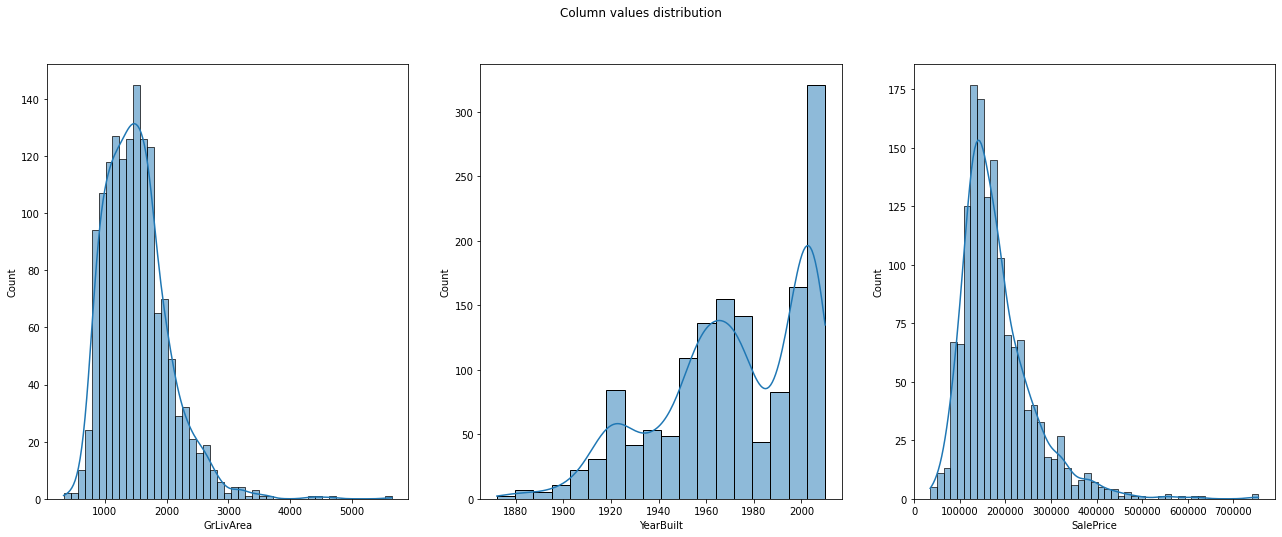

In [ ]:
from scipy.stats import probplot

fig, ax = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle("Column values distribution")
sns.histplot(data=df, x='GrLivArea', kde=True, ax=ax[0])
sns.histplot(data=df, x='YearBuilt', kde=True, ax=ax[1])
sns.histplot(data=df, x='SalePrice', kde=True, ax=ax[2])
plt.show()

**SalePrice**: Not follow normal distribution

**GrLiveArea** and **YearBuild**: Can scale

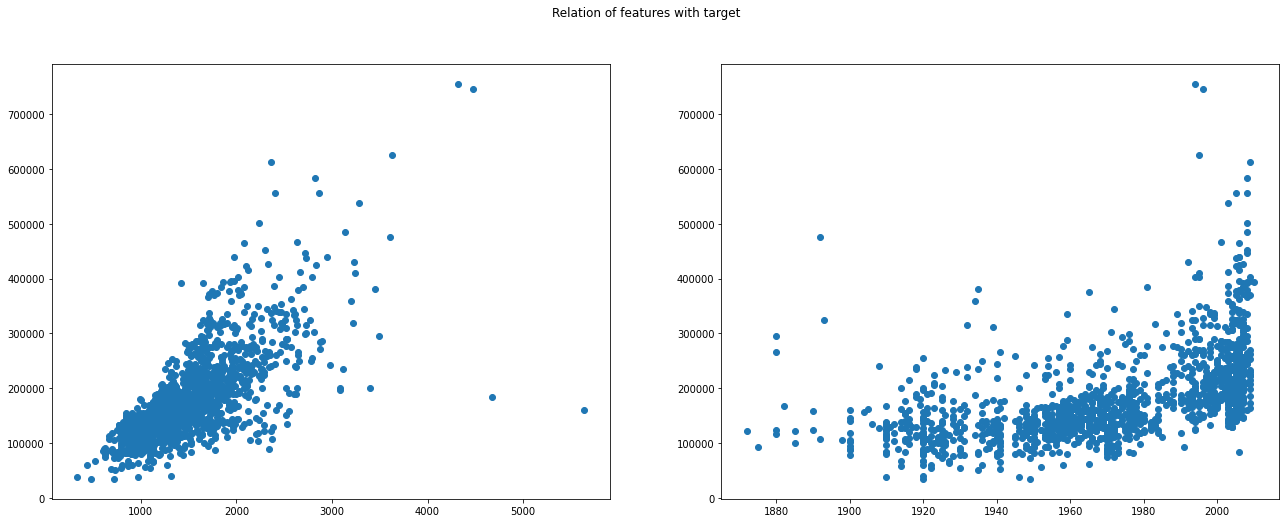

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle("Relation of features with target")
ax[0].scatter(df['GrLivArea'], df['SalePrice'])
ax[1].scatter(df['YearBuilt'], df['SalePrice'])
plt.show()

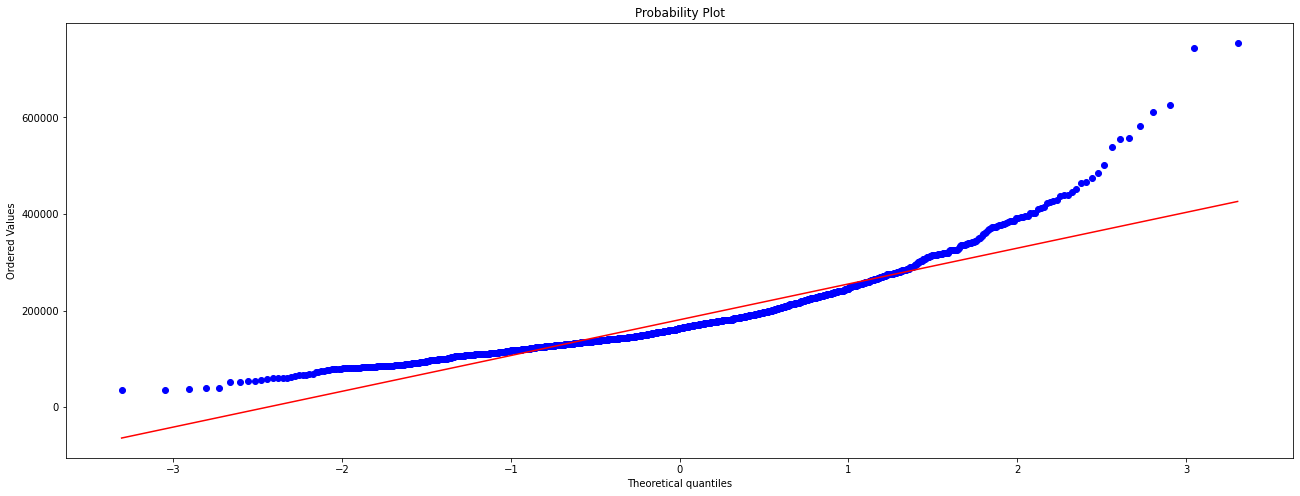

In [ ]:
plt.figure(figsize=(22, 8))
probplot(df['SalePrice'], plot=plt)
plt.show()

Check relation between target and all features

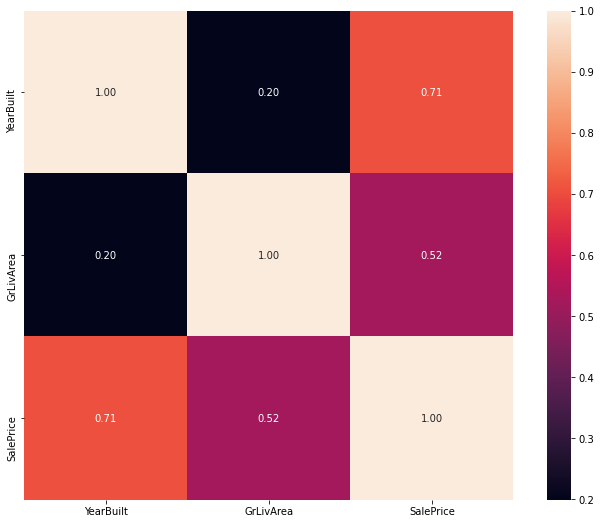

In [ ]:
def plot_heatmap(df):
    cols = ['YearBuilt', 'GrLivArea', 'SalePrice']
    corrmat = df.corr()
    plt.figure(figsize=(12, 9))
    sns.heatmap(corrmat, cbar=True, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, yticklabels=cols, xticklabels=cols)
    plt.show()

plot_heatmap(df)

Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def transform_and_split(data, scaler):
    """
    @Param:
        data with columns ['GrLivArea', 'YearBuilt', 'SalePrice']
    @Return:
        data with ['GrLivArea_scaled', 'YearBuilt_scaled', 'SalePrice_log']
    """
    X, y = data[:, :-1], data[:, -1]
    log_y = np.log(y)
    X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size=0.25, random_state=0)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = transform_and_split(df.values, StandardScaler())

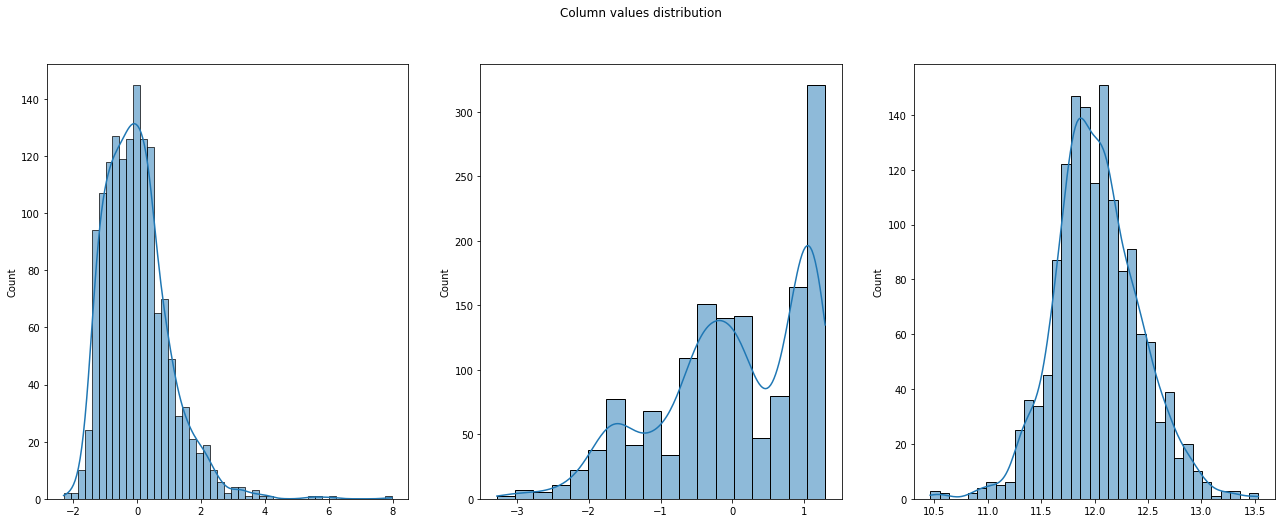

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle("Column values distribution")
sns.histplot(x=np.vstack([X_train, X_test])[:, 0], kde=True, ax=ax[0])
sns.histplot(x=np.vstack([X_train, X_test])[:, 1], kde=True, ax=ax[1])
sns.histplot(x=np.vstack([y_train[:, np.newaxis], y_test[:, np.newaxis]])[:, 0], kde=True, ax=ax[2])
plt.show()

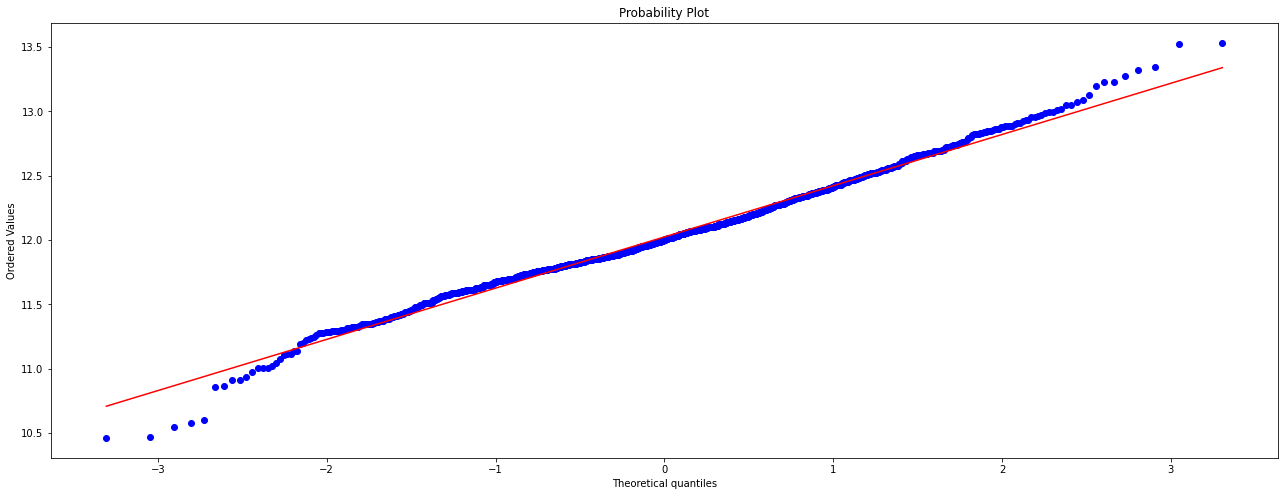

In [ ]:
plt.figure(figsize=(22, 8))
probplot(np.vstack([y_train[:, np.newaxis], y_test[:, np.newaxis]])[:, 0], plot=plt)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def train_model(data, model, model_name, scaler=StandardScaler()):
    """
    Train model and visualize result
    @Param:
        data: ndarray
        model: import from sklearn
        model_name: string
    @Return:
        mean squared error (MSE)
    """
    X_train, X_test, y_train, y_test = transform_and_split(data, scaler)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(model_name, f"MSE: {mse:.4f}")

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_xlabel("GrLivArea")
    ax[0].set_ylabel("SalePrice")
    ax[0].scatter(X_test[:, 0], y_pred, label="Predict")
    ax[0].scatter(X_test[:, 0], y_test, label="Actual")
    ax[0].legend()
    ax[1].set_xlabel("YearBuilt")
    ax[1].set_ylabel("SalePrice")
    ax[1].scatter(X_test[:, 1], y_pred, label="Predict")
    ax[1].scatter(X_test[:, 1], y_test, label="Actual")
    ax[1].legend()
    plt.show()

    return mse


Linear Regression MSE: 0.0536


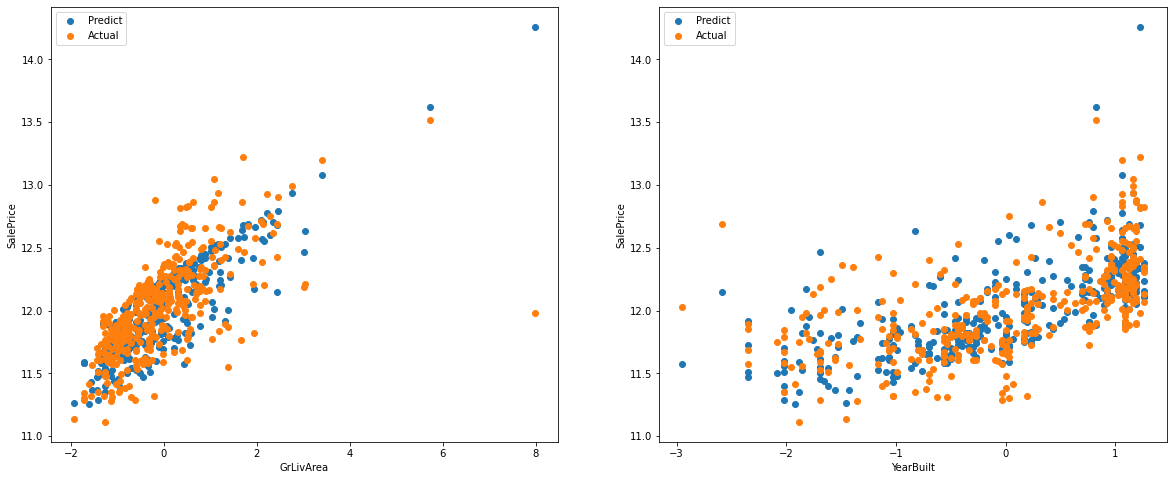

0.05362041512306184

In [ ]:
train_model(df.values, LinearRegression(), 'Linear Regression')

**[Problem 3] Comparison of methods**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

Linear Regression MSE: 0.0536


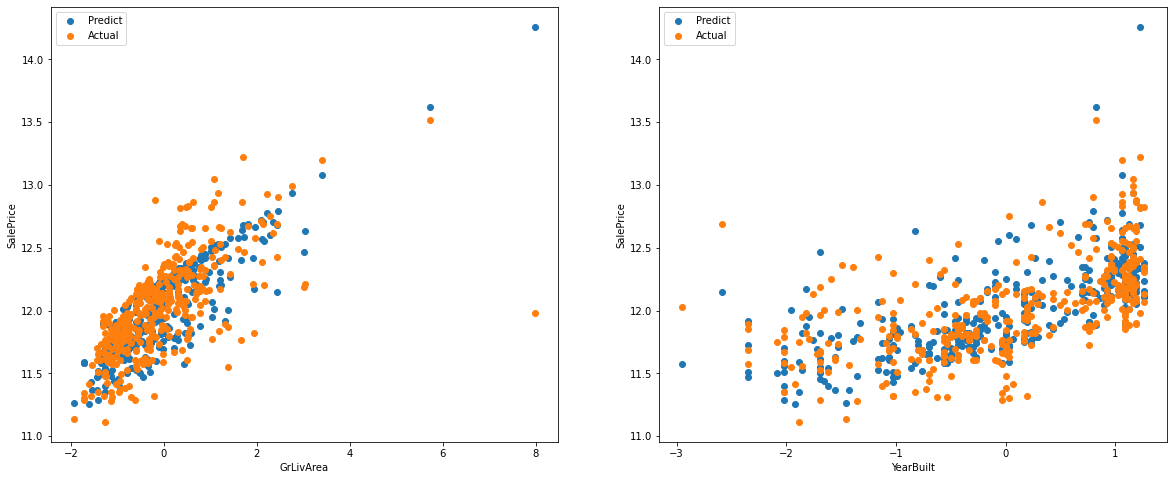

Support Vector Machine MSE: 0.0372


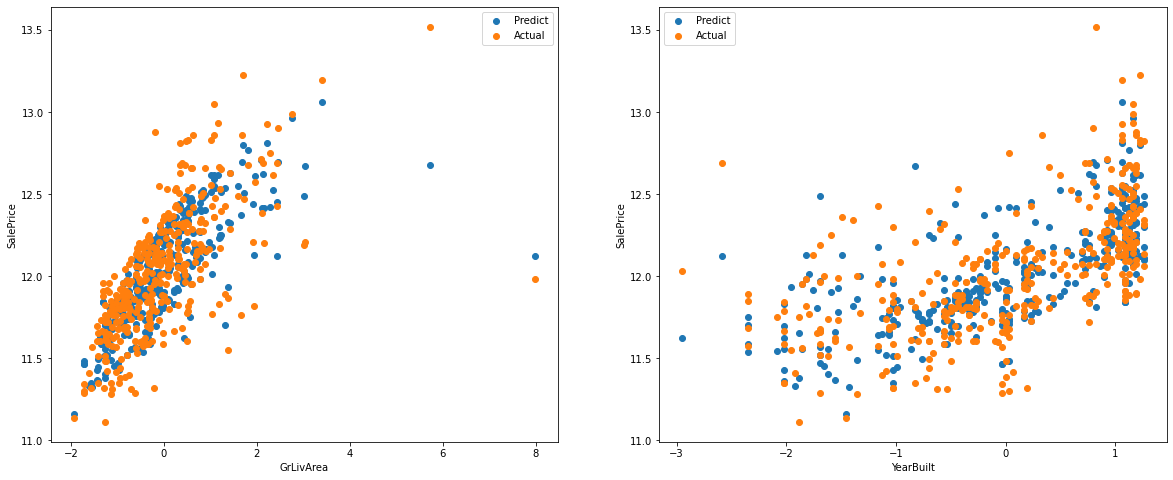

Decision Tree MSE: 0.0729


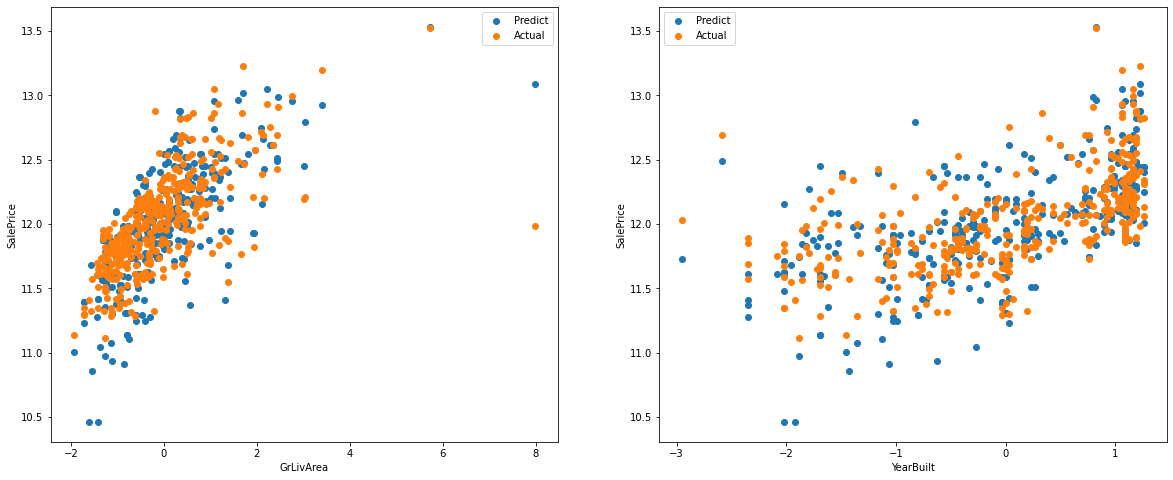

Random Forest MSE: 0.0421


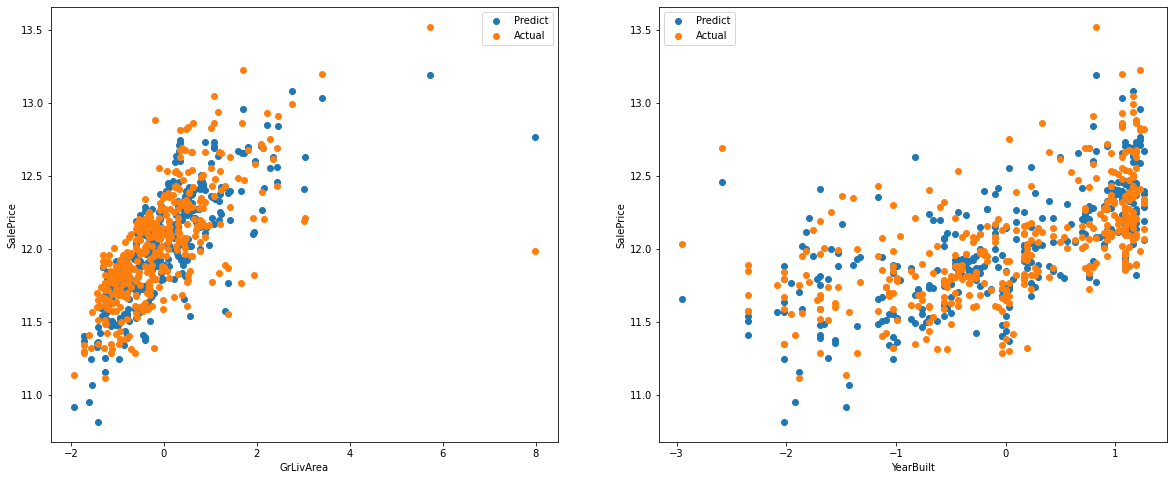

,Mean Squared Error (MSE)
Linear Regression,0.053620
Support Vector Machine,0.037214
Decision Tree,0.072922
Random Forest,0.042119


In [ ]:
model_names = ["Linear Regression", "Support Vector Machine", "Decision Tree", "Random Forest"]
models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor()]
mse_scores = [train_model(df.values, model, name) for model, name in zip(models, model_names)]
mse_summary = pd.DataFrame(mse_scores, index=model_names, columns=["Mean Squared Error (MSE)"])
mse_summary

**[Problem 4] (Advance assignment) Learning using other features**

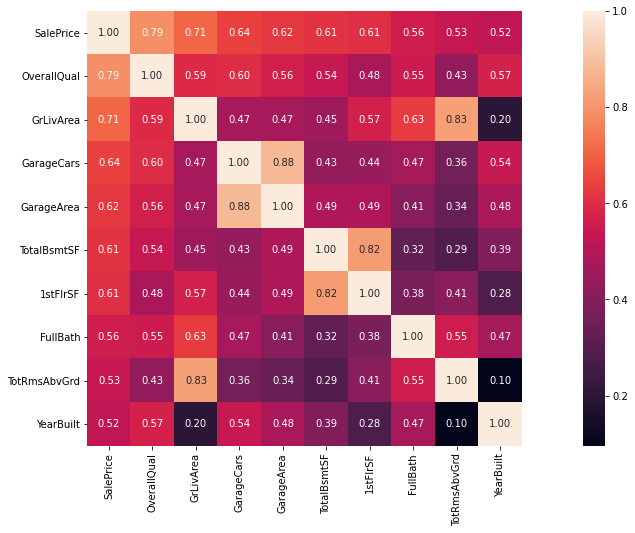

In [ ]:
# Simply selecting some features to train

df_qlf = df_all[df_all.columns[df_all.notnull().all()]]
corr_mat = df_qlf.corr()
cols = corr_mat.nlargest(10, 'SalePrice').index
top10_corr = np.corrcoef(df_qlf[cols].values.T)

plt.figure(figsize=(22, 8))
sns.heatmap(top10_corr, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=cols, xticklabels=cols)
plt.show()

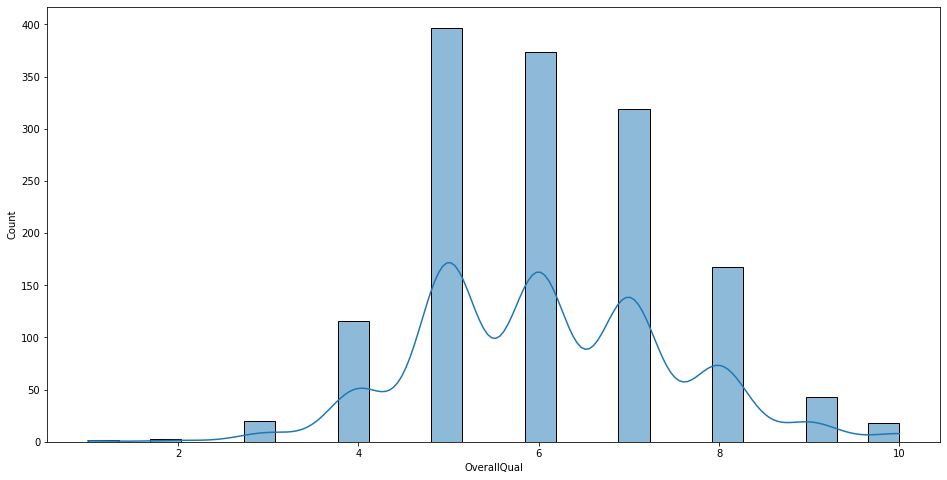

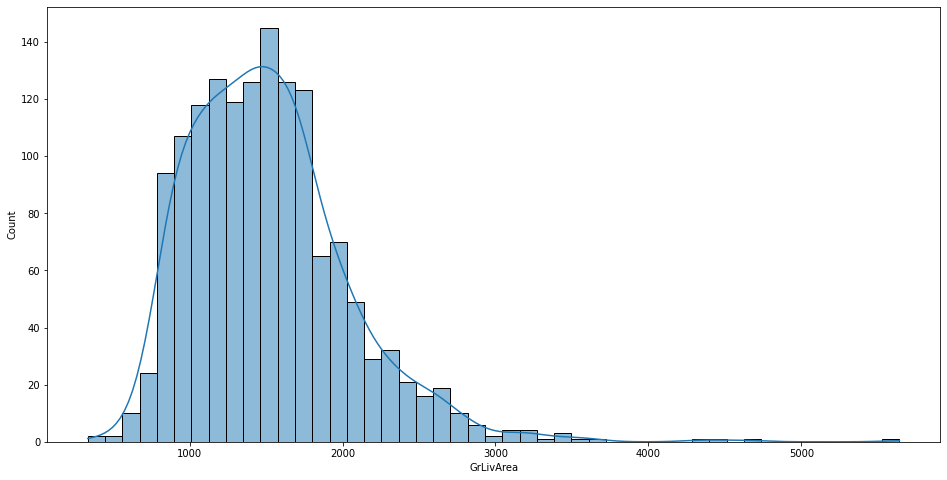

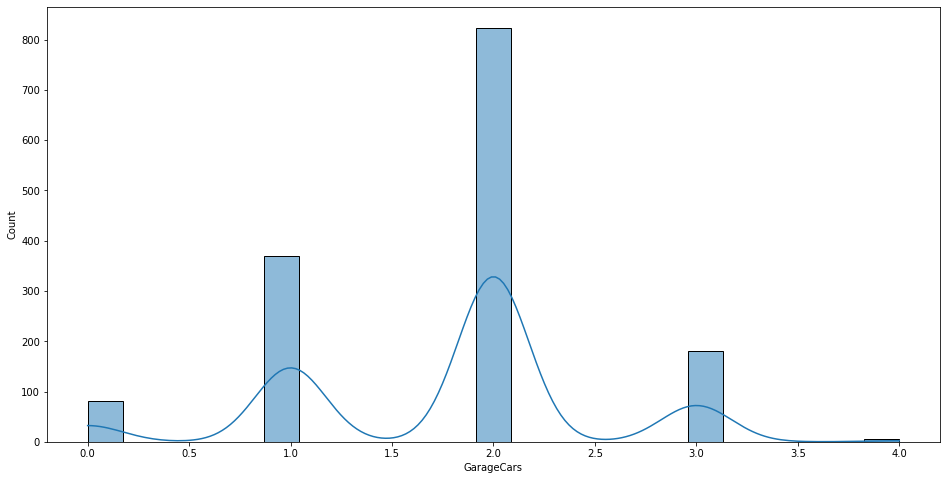

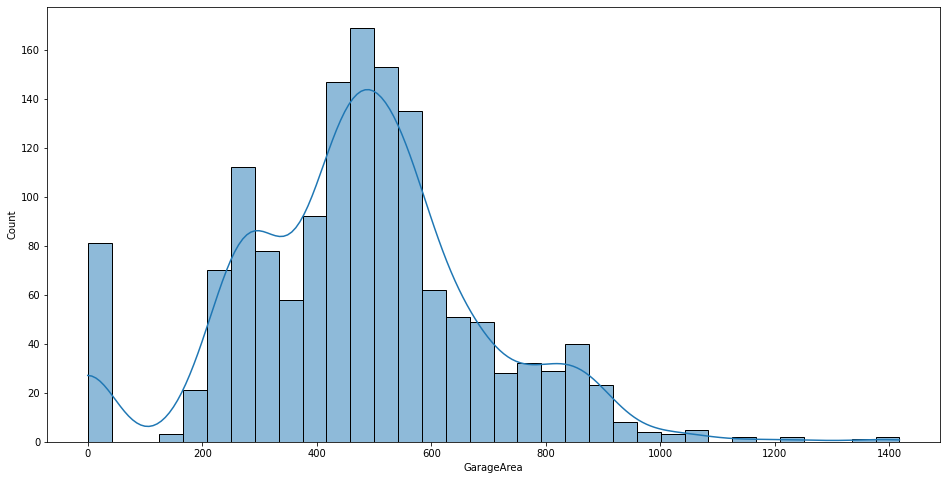

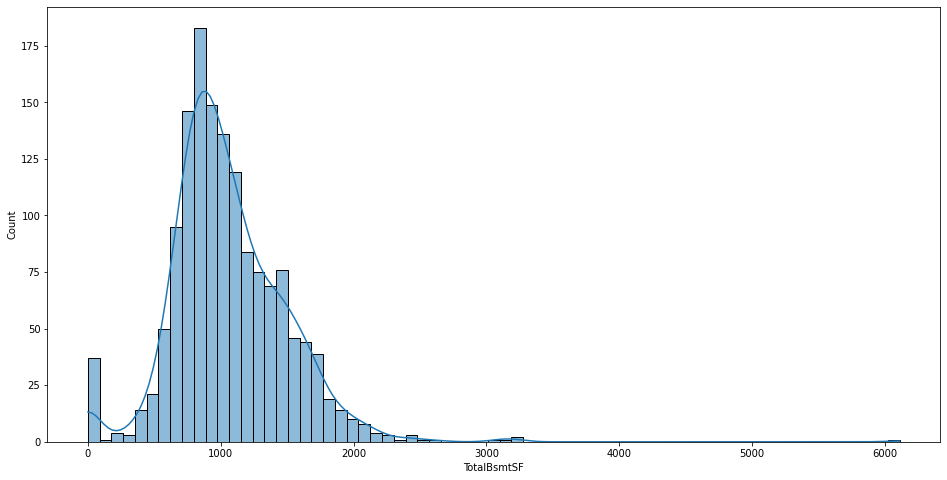

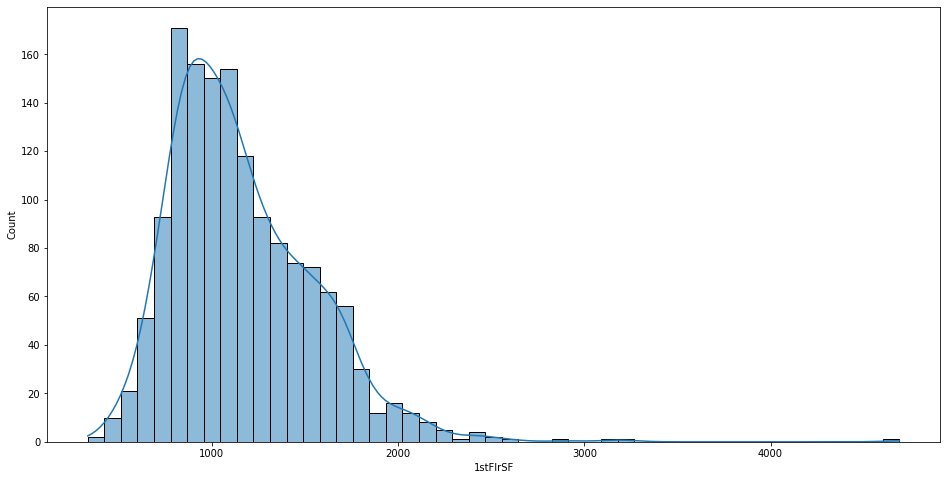

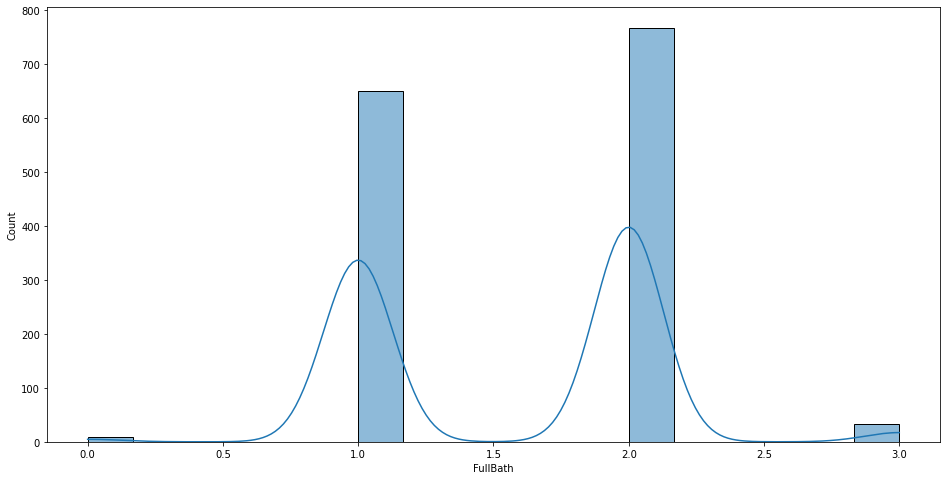

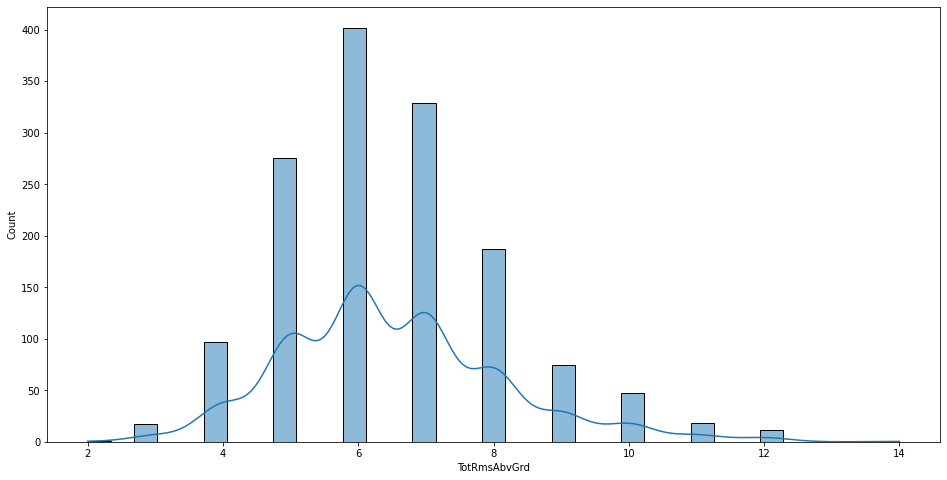

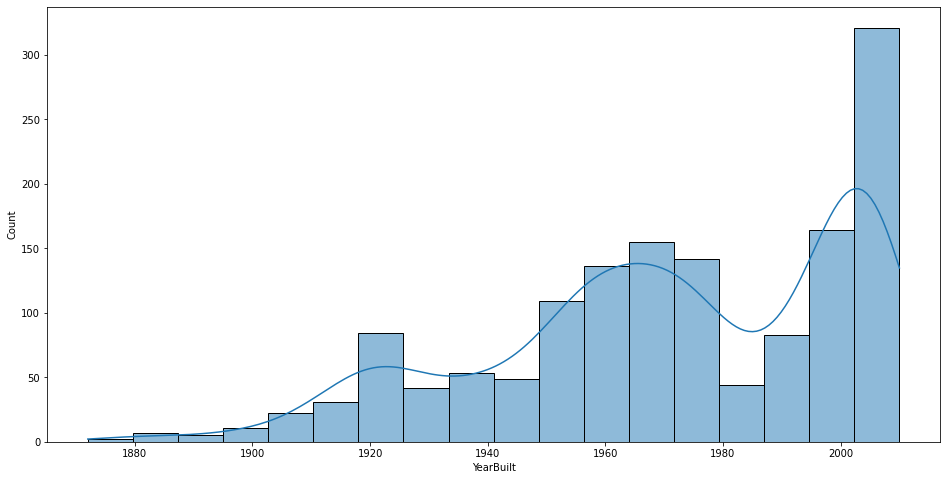

In [ ]:
cols_selected = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'SalePrice']
df_selected = df_qlf[cols_selected]

for col in cols_selected[:-1]:
    plt.figure(figsize=(16, 8))
    sns.histplot(data=df_selected, x=col, kde=True)
    plt.show()

In [ ]:

def train_model_more_features(dataframe, model, model_name, scaler=StandardScaler()):
    """
    Train model and visualize result
    @Param:
        dataframe: pd.DataFrame (updated from old train_model)
    @Return:
        mean squared error (MSE)
    """
    cols = dataframe.columns
    data = dataframe.values
    X_train, X_val, y_train, y_val = transform_and_split(data, scaler)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(model_name, f"MSE: {mse:.4f}")

    fig, ax = plt.subplots(1, len(cols)-1, figsize=(30, 8))
    for i, col in enumerate(cols[:-1]):
        ax[i].set_xlabel(col)
        ax[i].set_ylabel(cols[-1])
        ax[i].scatter(X_val[:, i], y_pred, label="Predict")
        ax[i].scatter(X_val[:, i], y_val, label="Actual")
        ax[i].legend()
    plt.show()

    return mse

Linear Regression MSE: 0.0397


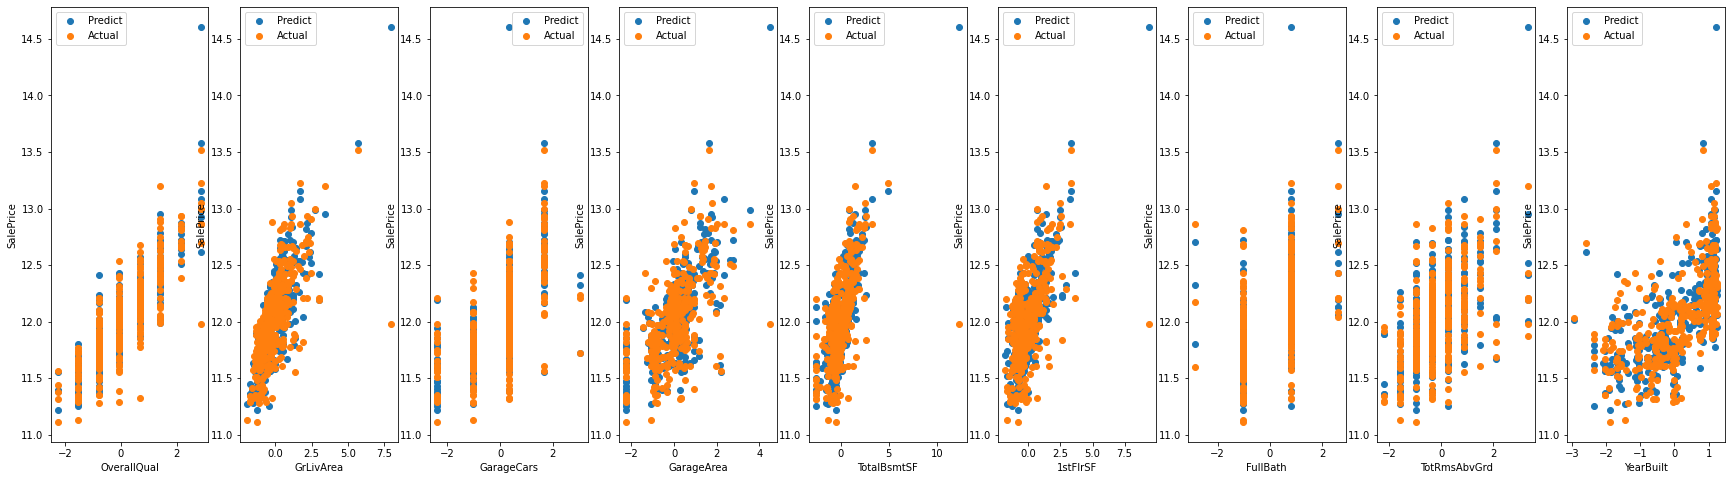

Support Vector Machine MSE: 0.0223


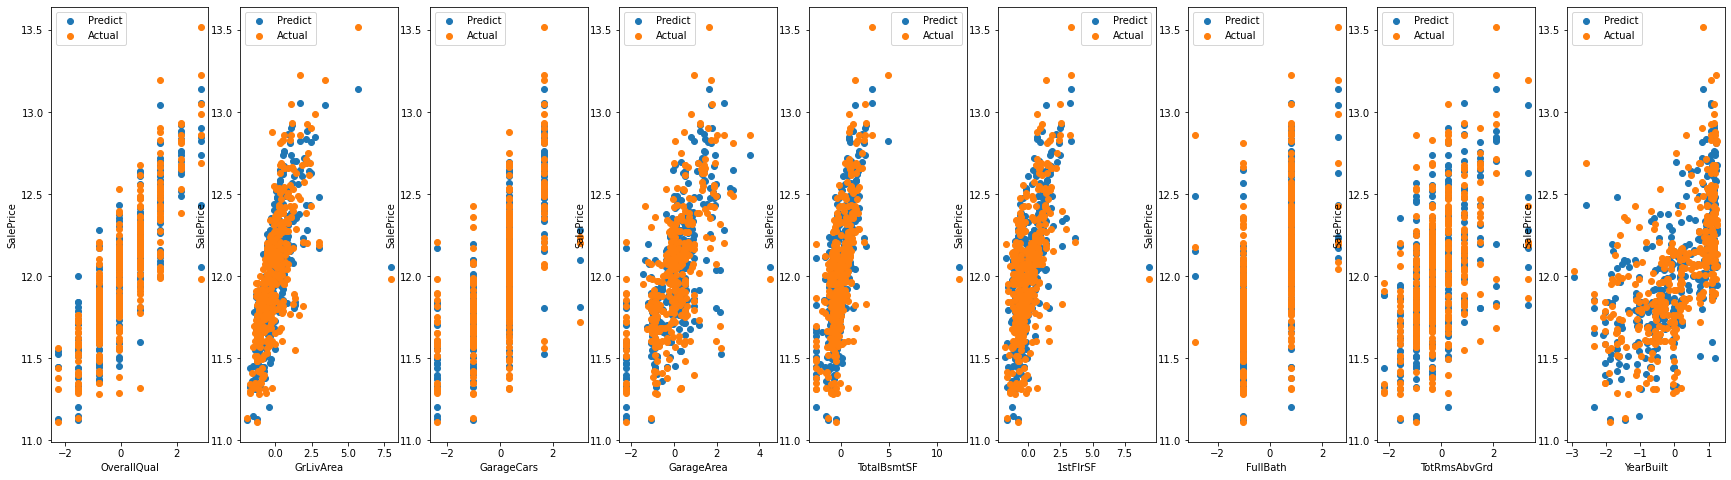

Decision Tree MSE: 0.0436


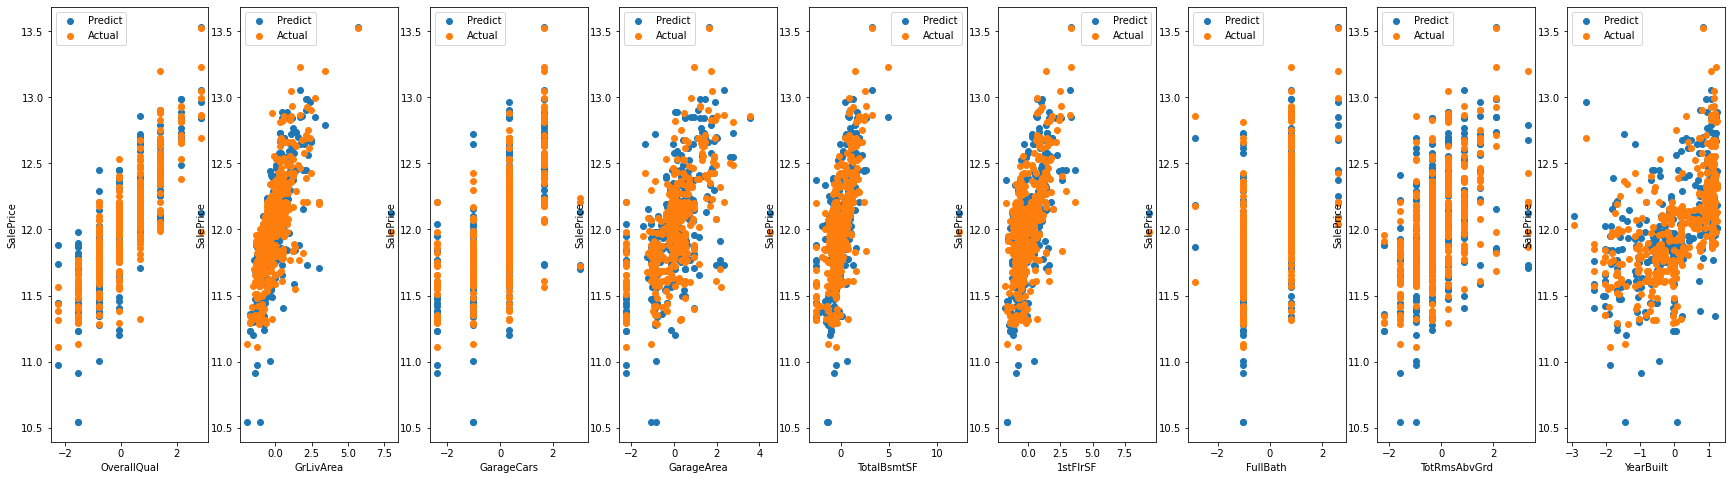

Random Forest MSE: 0.0219


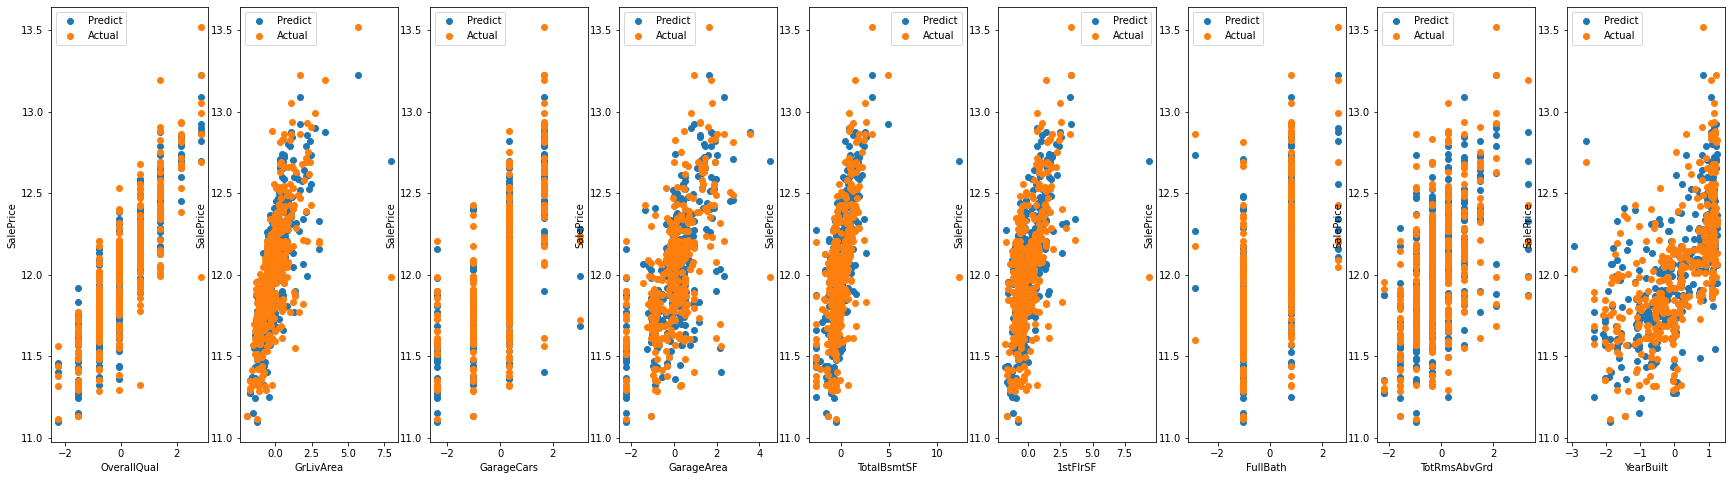

,Mean Squared Error (MSE)
Linear Regression,0.039660
Support Vector Machine,0.022295
Decision Tree,0.043577
Random Forest,0.021931


In [ ]:
mse_scores_more_features = [train_model_more_features(df_selected, model, name) for model, name in zip(models, model_names)]
mse_summary_more_features = pd.DataFrame(mse_scores_more_features, index=model_names, columns=["Mean Squared Error (MSE)"])
mse_summary_more_features

The MSE scores are improved because I have added more features.

=> With for information from other features, the models will be trained better.